In [28]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import StratifiedKFold

In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [26]:
def build_network():
    network = models.Sequential()
    network.add(layers.Dense(512, activation = "relu", input_shape = (28 * 28,)))
    network.add(layers.Dense(10, activation = "softmax"))
    network.compile(loss="sparse_categorical_crossentropy",
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    return network

In [24]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))
X_train = X_train / 255
X_test = X_test / 255

# from keras.utils import to_categorical
# y_train = to_categorical(y_train, 10) # 10 is number of classes
# y_test = to_categorical(y_test, 10)

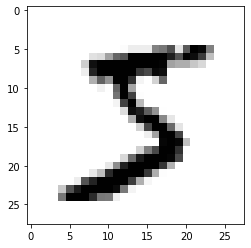

In [11]:
plt.imshow(X_train[0].reshape(28, 28), cmap = plt.cm.binary)

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Performing K-Fold Validation on Training Set

In [34]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

cv_scores = []
i = 1

for train, test in kfold.split(X_train, y_train):
    print("Processing fold #", i)
    network = build_network()
    network.fit(X_train[train], y_train[train], epochs = 10, batch_size = 128, verbose = 1)
    scores = network.evaluate(X_train[test], y_train[test], verbose = 0)
    cv_scores.append(scores[1])
    i += 1

Processing fold # 1
Train on 47995 samples
Epoch 1/10
47995/47995 [==============================] - 2s 36us/sample - loss: 2.2846 - accuracy: 0.1634
Epoch 2/10
47995/47995 [==============================] - 1s 31us/sample - loss: 2.1638 - accuracy: 0.2788
Epoch 3/10
47995/47995 [==============================] - 2s 31us/sample - loss: 2.0483 - accuracy: 0.4291
Epoch 4/10
47995/47995 [==============================] - 2s 32us/sample - loss: 1.9388 - accuracy: 0.5440
Epoch 5/10
47995/47995 [==============================] - 2s 32us/sample - loss: 1.8348 - accuracy: 0.6211
Epoch 6/10
47995/47995 [==============================] - 2s 32us/sample - loss: 1.7363 - accuracy: 0.6723
Epoch 7/10
47995/47995 [==============================] - 2s 33us/sample - loss: 1.6435 - accuracy: 0.7088
Epoch 8/10
47995/47995 [==============================] - 2s 34us/sample - loss: 1.5563 - accuracy: 0.7346
Epoch 9/10
47995/47995 [==============================] - 2s 34us/sample - loss: 1.4745 - accuracy: 0

In [35]:
print("CV SCORES:\n", cv_scores)

CV SCORES:
 [0.7695127, 0.7607899, 0.75958335, 0.7610236, 0.7600867]


In [36]:
print("MEAN CV SCORES: ", np.mean(cv_scores))

MEAN CV SCORES:  0.7621993


In [37]:
val_X = X_train[:10000]
val_y = y_train[:10000]

X = X_train[10000:]
y = y_train[10000:]

In [39]:
network = build_network()
history = network.fit(X, y, epochs = 50, batch_size = 128, validation_data = (val_X, val_y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 42us/sample - loss: 2.3121 - accuracy: 0.1395 - val_loss: 2.2505 - val_accuracy: 0.1711
Epoch 2/50
50000/50000 [==============================] - 2s 38us/sample - loss: 2.1853 - accuracy: 0.2158 - val_loss: 2.1225 - val_accuracy: 0.2692
Epoch 3/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.0650 - accuracy: 0.3429 - val_loss: 2.0025 - val_accuracy: 0.4279
Epoch 4/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.9515 - accuracy: 0.4887 - val_loss: 1.8894 - val_accuracy: 0.5562
Epoch 5/50
50000/50000 [==============================] - 2s 39us/sample - loss: 1.8444 - accuracy: 0.6027 - val_loss: 1.7833 - val_accuracy: 0.6446
Epoch 6/50
50000/50000 [==============================] - 2s 39us/sample - loss: 1.7433 - accuracy: 0.6696 - val_loss: 1.6834 - val_accuracy: 0.6922
Epoch 7/50
50000/50000 [==============================] 

In [40]:
def show_loss(hist):
    epochs = range(1, len(hist['val_loss']) + 1)
    loss = hist["loss"]
    val_loss = hist["val_loss"]
    plt.plot(epochs, loss, 'bo', label="Training Loss")
    plt.plot(epochs, loss, 'b', label = "Validation Loss")
    plt.legend()
    plt.show()

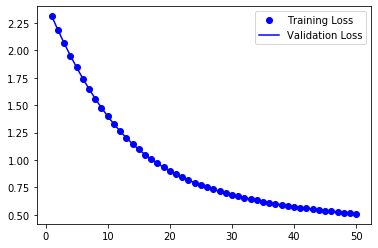

In [41]:
show_loss(history.history)